In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [ ]:
def f(x1,x2):
  return x1**2-10*x2*np.cos(0.2*np.pi*x1)+x2**2-15*x1*np.cos(0.4*np.pi*x2)

In [ ]:
x1=np.linspace(-15,15,100)
x2=np.linspace(-15,15,100)

X1,X2=np.meshgrid(x1,x2)
Z=X1**2-10*X2*np.cos(0.2*np.pi*X1)+X2**2-15*X1*np.cos(0.4*np.pi*X2)

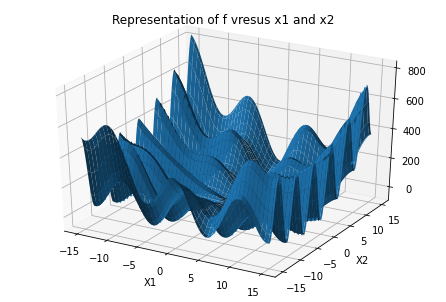

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X1, X2, Z)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Representation of f vresus x1 and x2")
plt.show()

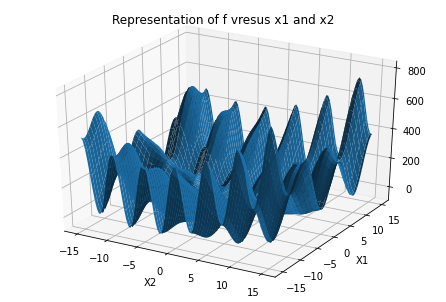

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X2, X1, Z)
plt.xlabel('X2')
plt.ylabel('X1')
plt.title("Representation of f vresus x1 and x2")
plt.show()

In [ ]:
import sympy as sym
x_sym = sym.Symbol('x')
y_sym = sym.Symbol('y')

In [ ]:
print(sym.diff(x_sym**2-10*y_sym*sym.cos(0.2*np.pi*x_sym)+y_sym**2-15*x_sym*sym.cos(0.4*np.pi*y_sym), x_sym))
print(sym.diff(x_sym**2-10*y_sym*sym.cos(0.2*np.pi*x_sym)+y_sym**2-15*x_sym*sym.cos(0.4*np.pi*y_sym), y_sym))

2*x + 6.28318530717959*y*sin(0.628318530717959*x) - 15*cos(1.25663706143592*y)
18.8495559215388*x*sin(1.25663706143592*y) + 2*y - 10*cos(0.628318530717959*x)


In [ ]:
def rond_f_x1(x1,x2):
  return 2*x1 + 6.28318530717959*x2*np.sin(0.628318530717959*x1) - 15*np.cos(1.25663706143592*x2)

In [ ]:
def rond_f_x2(x1,x2):
  return 18.8495559215388*x1*np.sin(1.25663706143592*x2) + 2*x2 - 10*np.cos(0.628318530717959*x1)

In [ ]:
def aggregate(x1,x2):
  return np.array([rond_f_x1(x1,x2),rond_f_x2(x1,x2)])

In [ ]:
x = 1
y = 4
h = 0.001
(f(x+h, y)-f(x, y))/h

12.14478649823647

In [ ]:
rond_f_x1(1,4)

12.137399728299304

In [ ]:
def grad_descent(f, gradf, init, alpha, max_iter):
    thresh = 1e-5
    prev_t = init-10*thresh
    t = init.copy()
    t = t.astype('float32')
    count = 0
    while np.sqrt(np.sum((t-prev_t)**2)) > thresh and count < max_iter:
        prev_t = t.copy()
        t -= alpha*gradf(t[0], t[1])
        #print("We are at the cordinate x:{} , y:{} , with the value of {} , and the gradien of {}\n".format(t[0],t[1],f(t[0], t[1]),gradf(t[0], t[1])))
        count += 1
    #print("We have converged with {} epochs".format(count))
    return np.append(init,f(t[0], t[1]))

In [ ]:
IN=grad_descent(f,aggregate, np.array([-5, 2]), 0.01 , 500)[:2]

In [ ]:
IN

array([-5.,  2.])

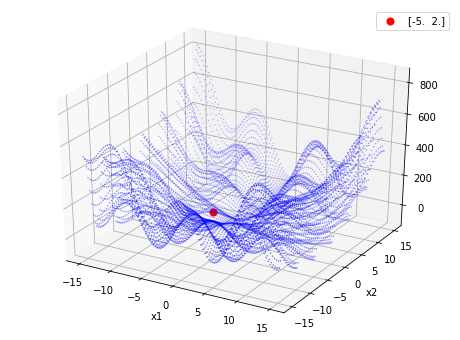

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter3D(X1, X2, f(X1, X2), color='blue',s=0.1);

ax.scatter3D(IN[0],IN[1], f(IN[0],IN[1]), color='red',s=50,label=IN);
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2');

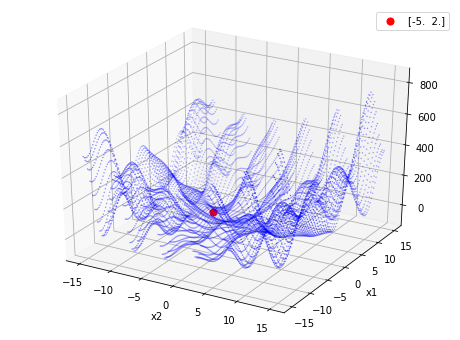

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter3D(X2, X1, f(X1, X2), color='blue',s=0.1);

ax.scatter3D(IN[0],IN[1], f(IN[0],IN[1]), color='red',s=50,label=IN);
ax.legend()
ax.set_xlabel('x2')
ax.set_ylabel('x1');

In [ ]:
x_test=np.linspace(-5,5,20)
y_test=np.linspace(-5,5,20)
t_val=np.zeros((400,3))
c=0
for x_t in x_test :
  for y_t in y_test:
    t_val[c]=grad_descent(f,aggregate, np.array([x_t, y_t]), 0.01 , 20)
    c+=1
    

In [ ]:
t_val

array([[ -5.        ,  -5.        , -68.77782185],
       [ -5.        ,  -4.47368421, -69.85476091],
       [ -5.        ,  -3.94736842, -69.87375312],
       ...,
       [  5.        ,   3.94736842, -46.82430998],
       [  5.        ,   4.47368421, -62.44401311],
       [  5.        ,   5.        , -65.24755256]])

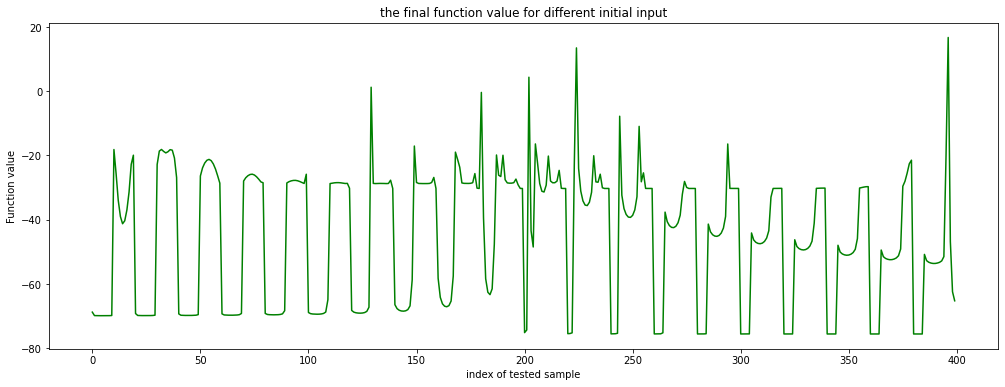

In [ ]:
fig=plt.figure(figsize=(17,6))
plt.plot(t_val[:,2],color='green');
plt.title('the final function value for different initial input');
plt.xlabel("index of tested sample")
plt.ylabel("Function value");

In [ ]:
np.min(t_val[:,2])

-75.57592081503407

In [ ]:
np.max(t_val[:,2])

16.73464661699043

In [ ]:
import pandas as pd
df=pd.DataFrame(t_val,columns=['x1_value','x2_value','function value'])
df

,x1_value,x2_value,function value
0,-5.0,-5.000000,-68.777822
1,-5.0,-4.473684,-69.854761
2,-5.0,-3.947368,-69.873753
3,-5.0,-3.421053,-69.880589
4,-5.0,-2.894737,-69.883623
...,...,...,...
395,5.0,2.894737,-20.096264
396,5.0,3.421053,16.734647
397,5.0,3.947368,-46.824310
398,5.0,4.473684,-62.444013


In [ ]:
def creat_boundary(num):
  if num<-70:
    return "close"
  elif -70<num<-50:
    return "far"
  else:
    return "farther"

In [ ]:
#df.drop('index',inplace=True,axis=1)

In [ ]:
df['function value']=df['function value'].apply(creat_boundary)
#df.reset_index(inplace=True)

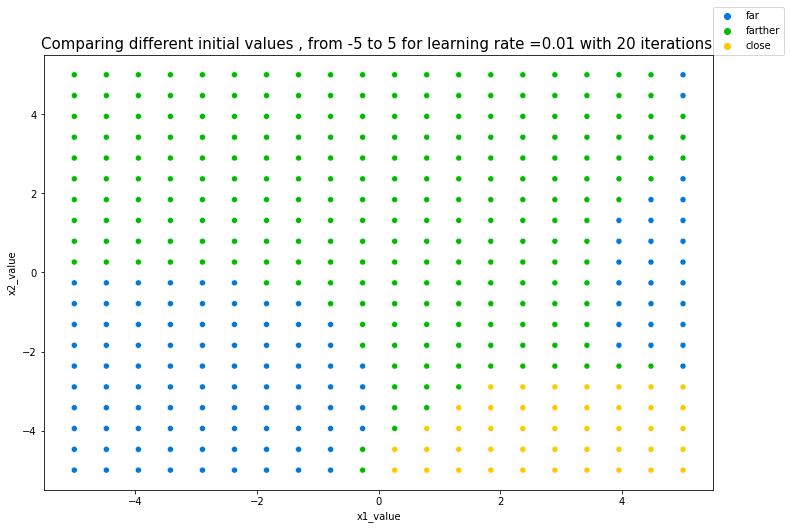

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.scatterplot(x='x1_value',y='x2_value',data=df,hue='function value',palette='nipy_spectral')
plt.legend(loc=(1,1));
plt.title('Comparing different initial values , from -5 to 5 for learning rate =0.01 with 20 iterations ',size=15);

In [ ]:
alfa=np.linspace(0.001,0.1,100)
iter=np.linspace(10,1000,50)
final_val=np.zeros((5000,3))
count=0
for c in iter:
  for a in alfa:
      A=grad_descent(f,aggregate, np.array([5, -3]), a , c)
      final_val[count]=np.array([c,a,A[2]])
      count+=1



In [ ]:
df1=pd.DataFrame(final_val,columns=['Iteration','Learning_rate','function value'])
df1

,Iteration,Learning_rate,function value
0,10.0,0.001,-4.307272
1,10.0,0.002,-63.074083
2,10.0,0.003,-73.593091
3,10.0,0.004,-74.656484
4,10.0,0.005,-74.965337
...,...,...,...
4995,1000.0,0.096,-21.844755
4996,1000.0,0.097,-23.285605
4997,1000.0,0.098,-11.440903
4998,1000.0,0.099,-25.564502


In [ ]:
df1['function value']=df1['function value'].apply(creat_boundary)

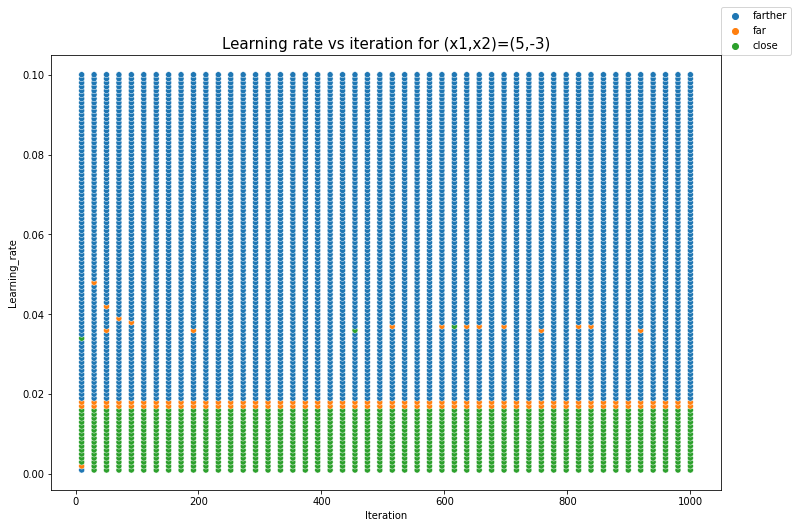

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.scatterplot(x='Iteration',y='Learning_rate',data=df1,hue='function value')
plt.legend(loc=(1,1));
plt.title('Learning rate vs iteration for (x1,x2)=(5,-3)',size=15);